# AQUECE MARATONA 2020! 

*   LOTE 2 ( 102,00 ) https://www.qoda.com.br/maratona-data-science-pre-venda/
*   LOTE 3 ( 222,00 )
*   LOTE FINAL ( 992,00 )




---
![](https://www.qoda.com.br/wp-content/uploads/2020/02/timeline-maratona.png)


---

*   LOTE 2 ( 102,00 ) https://www.qoda.com.br/maratona-data-science-pre-venda/
*   LOTE 3 ( 222,00 )
*   LOTE FINAL ( 992,00 )


# END TO END

---

Projeto que passa por todas etapas de um projeto Data Science.<br><br>
![alt text](https://miro.medium.com/max/377/1*_fR-2Yg-xaWXssnj08Zqeg.jpeg)

In [0]:
import pandas as pd
import numpy as np

## PREPARE DATA

---



### AQUISIÇÃO DE DADOS

---

https://www.kaggle.com/camnugent/california-housing-prices

In [0]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

### CLASSIFICAÇÃO VS. REGRESSÃO

---
![alt text](https://www.researchgate.net/profile/Yves_Matanga2/publication/326175998/figure/fig9/AS:644582983352328@1530691967314/Classification-vs-Regression.png)


### INDICADORES DE DESEMPENHO

---

Para problemas de regressão utilizamos comumente o RMSE(raiz do erro quadrático médio).
Para maiores informações acesse http://www-di.inf.puc-rio.br/~lopes//inf2391/Data_Science_Learning2.pdf

### ANÁLISE EXPLORATÓRIA DOS DADOS

In [0]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
# 10 features, sendo cada linha um distrito
# 20.639 amostras
housing.info()

NameError: ignored

In [0]:
# Única feature não-numérica
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [0]:
# Resumo numérico, "total_bedrooms" nos mostra alguns desafios
# SKILL NECESSÁRIA: Probabilidade/Estatística
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [0]:
# SKILL NECESSÁRIA: Probabilidade/Estatística, Dataviz, Análise de Dados
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

NameError: ignored

1. **"median_income"** não está expressa em dólares, sendo 15000 o valor para RENDA ALTA e 0,5 o valor para RENDA BAIXA
2. **"housing_median_age"** possui valores "estranhos", assim como **"housing_medium_value"**(target). Pode ser necessário coletar dados melhores ou remover amostras
3. Atributos estão em escalas diferentes: não em dólar, ano...
4. Aplicar modelos preditivos agora pode ser um grande problema: note que alguns histogramas apresentam cauda longa a direita, enquanto outros não(pode dificultar a generalização).

### PREPARAÇÃO DOS DADOS

### TRAIN/TEST SPLIT

---

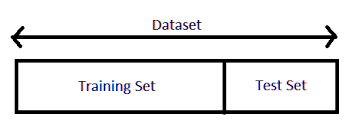

In [0]:
!pip install scikit-learn

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [0]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


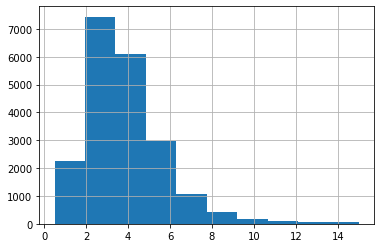

In [0]:
housing["median_income"].hist()

"median_incoming" está agrupada em torno de 2 a 5 (dezenas de milhares de dólares), mas algumas rendas medianas vão muito além de 6. Isto pode enviesar nossos dados, ou seja, forçar uma tendência na hora da predição. Estratificar dados se faz necessário para que as amostras coletadas sejam proporcionais. Utilizaremos numpy para normalizar estes dados e criar novas features.

### FEATURE ENGINEERING

In [0]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit #estratificação
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [0]:
# Dividimos os valores pelo tamanho do dataset e assim verificamos as proporções de "income_cat"
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

### DATAVIZ

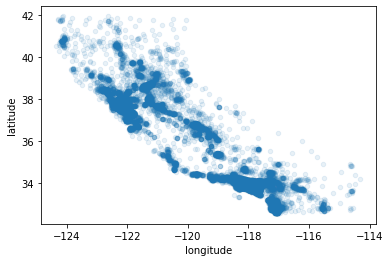

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) #alpha se refere a densidade dos pontos

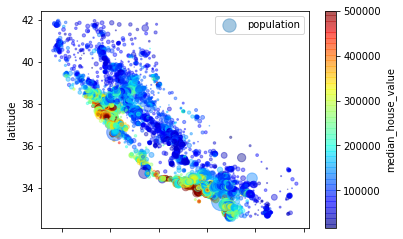

In [0]:
# A localização afeta o preço destes imóveis? 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [0]:
# Suficiente para uma correlação? valores entre -1 a 1, onde 1 significa CORRELAÇÃO POSITIVA FORTE
# Coeficiente de correlação de Pearson
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5bd2678d0>,
      dtype=object)

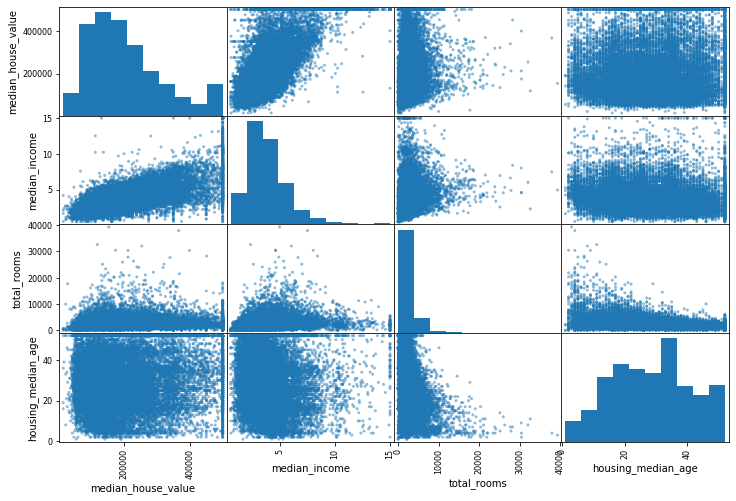

In [0]:
# Correlação com PANDAS
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### DATA CLEANING

In [0]:
# Removendo nossa target dos dados de TREINO
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy() # realizamos uma cópia e armazenamos na variável "housing_labels"

In [0]:
# Verificando dados ausentes
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [0]:
# Utilizando Simple Imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [0]:
# Limpando dados ausentes(missing values)
sample_incomplete_rows.drop("total_bedrooms", axis=1)  
median = housing["total_bedrooms"].median()


In [0]:
# Removemos a categoria não-numérica
housing_num = housing.drop('ocean_proximity', axis=1)

In [0]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [0]:
# Transformaremos agora o conjunto TREINO com missing values substituidos pela mediana
X = imputer.transform(housing_num)

In [0]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


***Estimadores:*** Qualquer objeto que possa estimar alguns parâmetros com base em um conjunto de dados é chamado de estimador (por exemplo, um imputador é um estimador). A estimativa em si é realizada pelo método fit() e utiliza apenas um conjunto de dados como parâmetro (ou dois para algoritmos de aprendizado supervisionado; o segundo conjunto de dados contém os rótulos). Qualquer outro parâmetro necessário para orientar o processo de estimativa é considerado um hiperparâmetro (como a estratégia de um imputador) e deve ser definido como uma variável de instância (geralmente via parâmetro construtor).

---

***Transformadores:*** Alguns estimadores (como um imputador) também podem transformar um conjunto de dados; estes são chamados de transformadores. Mais uma vez, a API é bastante simples: a transformação é realizada pelo método transform() com o conjunto de dados para transformar como parâmetro. Retorna o conjunto de dados transformado. Essa transformação geralmente depende dos parâmetros aprendidos, como é o caso de um imputador. Todos os transformadores também têm um método de conveniência chamado fit_transform()

In [0]:
# PRÉ PROCESSAMENTO DA FEATURE CATEGORICA "ocean_proximity"
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [0]:
# Lidando com dados NÃO-NUMÉRICOS 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [0]:
# BINARIZAR
# É possível transformar inteiros em categorias, assim como categorias em números inteiros
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [0]:
# ONE HOT ENCODER
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [0]:
encoder.categories_

[array([0, 1, 2, 3, 4])]

In [0]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

### TRANSFORMAÇÃO CUSTOMIZADA

---

Feature Scaling é uma das mais importantes transformações de dados disponível, sendo geralmente dividida em "Min/Max scaling" e "Standardization".

### MIN/MAX SCALING
Os valores são alterados e redimensionados para que acabem variando de 0 a 1. Fazemos isso subtraindo o valor mínimo e dividindo pelo máximo menos o mínimo. O Scikit-Learn fornece um transformador chamado MinMaxScaler para isso. Ele possui um hiperparâmetro feature_range que permite alterar o intervalo, se você não quiser de 0 a 1 por algum motivo.

### STANDARDIZATION
Diferentemente da escala min-max, a padronização não vincula valores a um intervalo específico, o que pode ser um problema para alguns algoritmos (por exemplo, redes neurais geralmente esperam um valor de entrada que varia de 0 a 1). No entanto, a padronização é muito menos afetada pelos valores discrepantes. Por exemplo, suponha que um distrito tenha uma renda mediana igual a 100 (por engano). A escala Min-max esmagaria todos os outros valores de 0 a 15 para 0 a 0,15, enquanto a padronização não seria muito afetada. O Scikit-Learn fornece um transformador chamado StandardScaler para padronização.

Neste exemplo, o transformador possui um hiperparâmetro, add_bedrooms_per_room, definido como True por padrão (geralmente é útil fornecer padrões sensíveis). Esse hiperparâmetro permitirá que você descubra facilmente se a adição desse atributo ajuda os algoritmos de Machine Learning ou não. De maneira mais geral, você pode adicionar um hiperparâmetro para bloquear qualquer etapa de preparação de dados que você não tem 100% de certeza. Quanto mais você automatizar essas etapas de preparação de dados, mais combinações você pode experimentar automaticamente, aumentando a probabilidade de encontrar uma ótima combinação (e economizando muito tempo).

In [0]:
# Maiores infos em https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html?highlight=baseestimator#sklearn.base.BaseEstimator
# Maiores infos em https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html?highlight=transformermixin#sklearn.base.TransformerMixin

from sklearn.base import BaseEstimator, TransformerMixin

# Índices das colunas com list comprehension
rooms_ix, bedrooms_ix, population_ix, household_ix = [list(housing.columns).index(col) for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [0]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder(add_extra_features)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
 
 def __init__(self, attribute_names):
   self.attribute_names = attribute_names
 
 def fit(self, X, y=None):
   return self
 
 def transform(self, X):
   return X[self.attribute_names].values

O Pipeline faz uma lista de pares nome/estimador, definindo uma sequência de etapas. Todos, exceto o último estimador, devem ser transformadores (ou seja, eles devem ter um método "fit_transform()"). Os nomes podem ser o que você quiser. Quando você chama o método fit() do pipeline, ele chama fit_transform() sequencialmente em todos os transformadores, passando a saída de cada chamada como parâmetro para a próxima chamada, até atingir o estimador final, para o qual chama apenas método fit().

In [0]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

Agora você tem um pipeline para valores numéricos e também precisa aplicar o LabelBinarizer nos valores categóricos: como você pode unir essas transformações em um único pipeline? O Scikit-Learn fornece uma classe FeatureUnion para isso. Você fornece uma lista de transformadores(que podem ser Pipelines). O método transform() é chamado de cada transformador em paralelo, aguardando a sua saída e concatenando-os, retornando o resultado. 

In [0]:
 housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### MODELO PREDITIVO(TREINO)

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [0]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [0]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

Nosso modelo esta errando em, aproximadamente, $68.376,64! Temos agora um exemplo claro de UNDERFITTING<br><br>![alt text](https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1526498075543.png)
<br><br>
Quando isso acontece, pode significar que os recursos não fornecem informações suficientes para fazer boas previsões ou que o modelo não é poderoso o suficiente. O que fazer?
*   Selecionar modelo mais poderoso, outro algoritmo...
*   Reduzir restrições no modelo/adicionar novas features.



In [0]:
# Tentaremos com novo algoritmo, diferente da REGRESSÃO LINEAR

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [0]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Uau! modelo perfeito?! Não! Agora temos o OVERFITTING!
![alt text](https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1526498075543.png)

### CROSS-VALIDATION!
![alt text](https://miro.medium.com/max/1368/0*P--gozwUfJ0TKtEp.png)

In [0]:
# UTILIZANDO DECISIONTREEREGRESSOR
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70274.7991723  67258.3624668  71350.42593227 68882.91340979
 70987.99296566 74177.52037059 70788.57311306 70850.53018019
 76430.62239321 70212.6471067 ]
Mean: 71121.4387110585
Standard deviation: 2434.3080046605132


In [0]:
# UTILIZANDO LINEARREGRESSION
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449328
Standard deviation: 2662.7615706103393


In [0]:
# TENTAREMOS COM OUTRO ALGORITMO: RANDOMFORESTREGRESSOR
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18658.03304748963

In [0]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49558.88555766 47165.97606887 49730.61239059 52208.37943521
 50035.31770966 53740.96439305 48743.94699717 48276.70762366
 52870.58122386 50453.02703152]
Mean: 50278.43984312504
Standard deviation: 1984.6771347015253


### FINE-TUNE MODEL ou AJUSTES DE PARÂMETROS

---

Uma maneira de fazer isso seria mexer nos hiperparâmetros manualmente, até encontrar uma ótima combinação de valores de hiperparâmetros. Isso seria um trabalho muito tedioso e talvez você não tenha tempo para explorar muitas combinações. Em vez disso, você deve fazer com que o GridSearchCV do Scikit-Learn o procure. Tudo o que você precisa fazer é dizer com quais hiperparâmetros você deseja experimentar e quais valores testar e avaliará todas as combinações possíveis de hiperparâmetro, usando validação cruzada. Por exemplo, o código a seguir procura a melhor combinação de valores de hiperparâmetro para o RandomForestRegressor:


In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64643.50026371719 {'max_features': 2, 'n_estimators': 3}
55801.230889068174 {'max_features': 2, 'n_estimators': 10}
53520.55855975294 {'max_features': 2, 'n_estimators': 30}
61218.73347053449 {'max_features': 4, 'n_estimators': 3}
53487.07584811946 {'max_features': 4, 'n_estimators': 10}
51513.820376494026 {'max_features': 4, 'n_estimators': 30}
60467.738481291846 {'max_features': 6, 'n_estimators': 3}
52892.358927639594 {'max_features': 6, 'n_estimators': 10}
50819.643470203395 {'max_features': 6, 'n_estimators': 30}
59948.44554326111 {'max_features': 8, 'n_estimators': 3}
52810.73643550265 {'max_features': 8, 'n_estimators': 10}
50875.36455790449 {'max_features': 8, 'n_estimators': 30}
62020.77719256325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54423.90173857082 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60943.96015462024 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53165.477374448004 {'bootstrap': False, 'max_features': 3, 'n_estimator

### EVALUATE MODEL ou AVALIAÇÃO DOS MODELOS

---

Depois de ajustar seus modelos por um tempo, você finalmente terá um sistema com desempenho suficiente. Agora é a hora de avaliar o modelo final no conjunto de testes. Não há nada de especial nesse processo; basta obter os preditores e os rótulos do seu conjunto de testes, execute seu full_pipeline para transformar os dados (chamada transform(), não fit_transform ()) e avalie o modelo final no conjunto de testes

In [0]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_rmse

49076.91374832637

O desempenho geralmente será um pouco pior do que você mediu usando a validação cruzada se você fez muitos ajustes de hiperparâmetro (porque seu sistema acaba sendo ajustado para ter um bom desempenho nos dados de validação e provavelmente não terá um bom desempenho em conjuntos de dados desconhecidos). Agora vem a fase de pré-lançamento do projeto: você precisa apresentar sua solução (destacar o que aprendeu, o que funcionou e o que não funcionou, que suposições foram feitas e quais são as limitações do seu sistema), documentar tudo e criar boas apresentações com visualizações claras e declarações fáceis de lembrar (por exemplo, “median_income" é o preditor número um dos preços da habitação”).

## Referências bibliográficas<br>
https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb<br><br>
![alt text](https://m.media-amazon.com/images/S/aplus-media/vc/399b38c4-ae00-4ca3-b01f-4d482ab4cdeb.__CR133,0,1064,1418_PT0_SX300_V1___.png)

# DATASET PRÉ-PRONTO

---
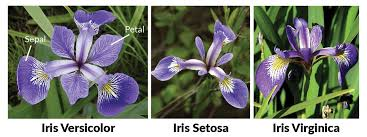


In [0]:
#CARREGANDO LIBRARIES
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
clf.feature_importances_

array([0.01333333, 0.        , 0.56405596, 0.42261071])

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
#underfited: generaliza tudo
#good fit: equilibrio entre generalização e decorar = o ideal
#overfitted: decora dados
iris.data[0]
clf.predict([iris.data[0]])

array([0])

In [0]:
#metricas de avaliação
from sklearn import metrics
pred = clf.predict(iris.data)
metrics.accuracy_score(iris.target, pred)

1.0

In [0]:
# 1.0 = 100% (nada é 100%: esta errado!) é preciso uma parte do dataset para aprender e a outra parte para testar! imagine voce fazer uma prova com os mesmos exericios estudados: voce vai apenas testar sua memoria, nao a inteligencia
clf.fit(iris.data[:120], iris.target[:120])
pred = clf.predict(iris.data[120:])
metrics.accuracy_score(iris.target[120:], pred)

0.8333333333333334

In [0]:
# o problema aqui? pegamos apenas os primeiros modelos, a maquina nao entendera ou aprendera como treinar os ultimos, afinal o dataset esta ordenado! 80% esta ok, mas se aparecer um target 2(versicolour) ele nao acertara pois nao aprendeu o que é versicolour!
#a maquina aprendeu o que é virginia e setosa, nao versicolour = BALANCEIE OS DADOS!
iris.target[120:],pred

In [0]:
#validação cruzada é avaliar os dados com ele mesmo = média da validation cross
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf,iris.data, iris.target, cv=10)
#cv é o numero de vezes da validação cruzada! ou seja, ensinou para 90% e treinou em 10%(cv)ele rodou 10x a forma randomica! por default rodaria 3! quanto maior o cv

In [0]:
import numpy as np
np.mean(score)

0.9533333333333334

In [0]:
print(metrics.classification_report(iris.target[120:],pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.83      0.91        30

    accuracy                           0.83        30
   macro avg       0.50      0.42      0.45        30
weighted avg       1.00      0.83      0.91        30



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
